In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import KFold

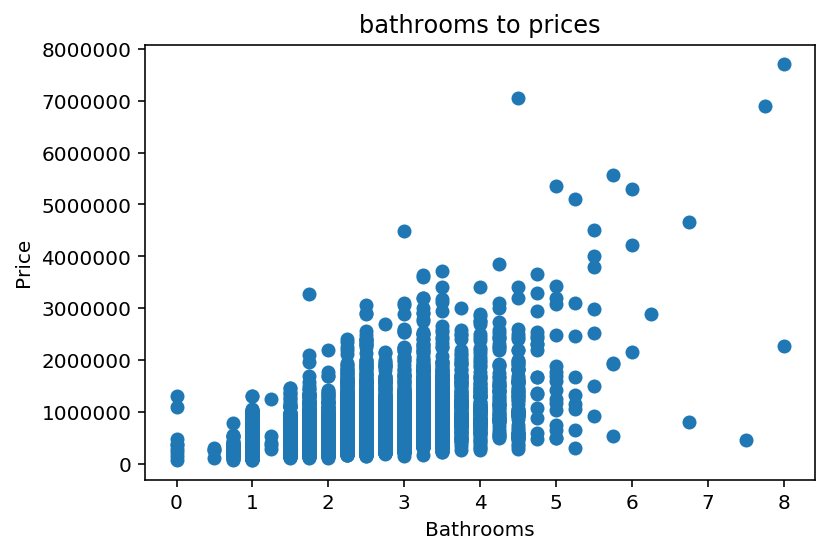

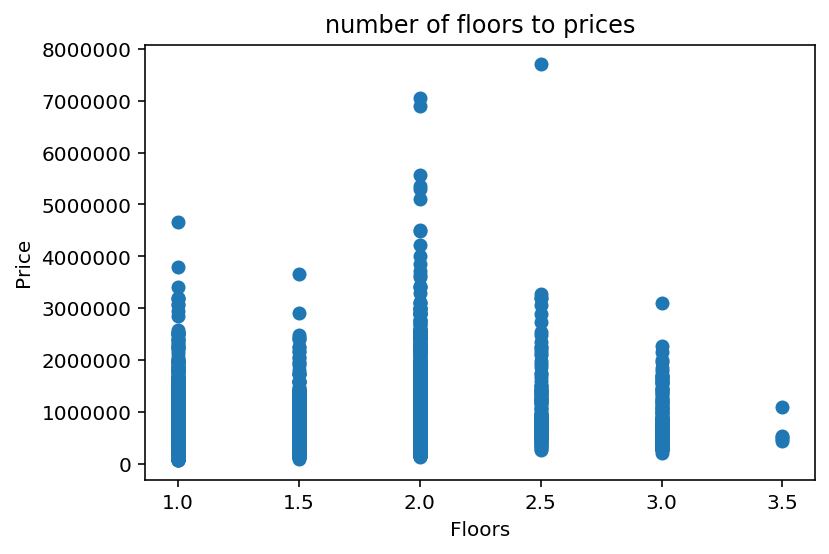

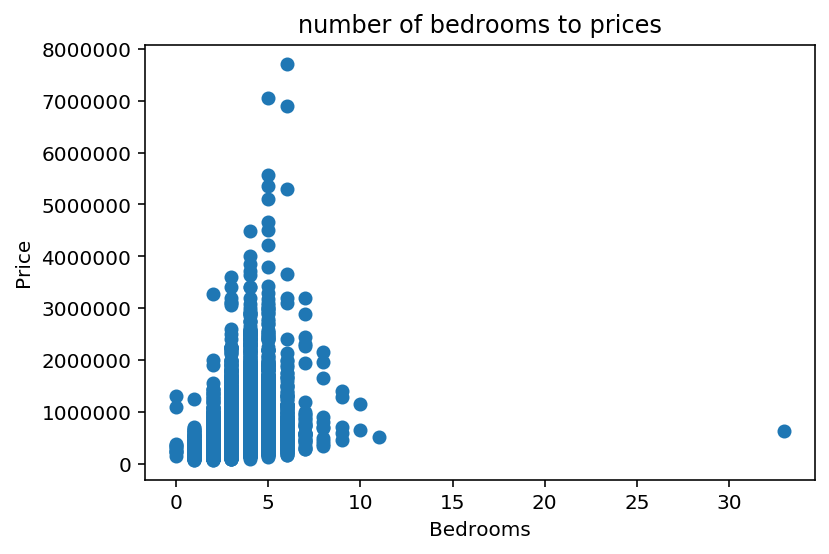

In [2]:
# Importing the data
data = pd.read_csv("house_prices_data_training_data.csv")

# Visualizing the data using scatter plot
fig, ax = plt.subplots()
fig, living = plt.subplots()
fig, bedrooms = plt.subplots()

ax.scatter(data['bathrooms'], data['price'])
ax.set_title('bathrooms to prices')
ax.set_xlabel('Bathrooms')
ax.set_ylabel('Price')

living.scatter(data['floors'], data['price'])
living.set_title('number of floors to prices')
living.set_xlabel('Floors')
living.set_ylabel('Price')

bedrooms.scatter(data['bedrooms'], data['price'])
bedrooms.set_title('number of bedrooms to prices')
bedrooms.set_xlabel('Bedrooms')
bedrooms.set_ylabel('Price')


# Getting 60% of the data as training, 20% testing, 20% cross validation
price = data['price'].values[0:10799]
price_testing = data['price'].values[10800:14399]
cross_validation = (data.dropna()).values[14400:(len(data)-1)]
data = data.drop(['date','price'],axis=1)
train = data.values[0:10799]
testing = data.values[10800:14399]
cross_validation = (data.dropna()).values[14400:(len(data)-1)]

In [3]:
print(train)

[[ 7.12930052e+09  3.00000000e+00  1.00000000e+00 ... -1.22257000e+02
   1.34000000e+03  5.65000000e+03]
 [ 6.41410019e+09  3.00000000e+00  2.25000000e+00 ... -1.22319000e+02
   1.69000000e+03  7.63900000e+03]
 [ 5.63150040e+09  2.00000000e+00  1.00000000e+00 ... -1.22233000e+02
   2.72000000e+03  8.06200000e+03]
 ...
 [ 9.54240008e+09  4.00000000e+00  2.00000000e+00 ... -1.22173000e+02
   2.51000000e+03  1.10410000e+04]
 [ 3.22306906e+09  2.00000000e+00  1.75000000e+00 ... -1.22060000e+02
   1.62000000e+03  1.12384000e+05]
 [ 1.72450003e+09  4.00000000e+00  2.50000000e+00 ... -1.22339000e+02
   1.71000000e+03  7.90900000e+03]]


In [4]:
# Normalizing the training data

data_norm = abs(np.subtract(train,train.mean(axis=0)))
data_norm = np.divide(data_norm,train.max(axis=0))
ones = np.ones((data_norm.shape[0],1))
data_norm = np.hstack((ones,data_norm))

In [5]:
# The initial value of theta is zeros
theta=np.zeros(20)

In [6]:
def computeCost(X, y, theta):
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly

    
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    H = np.dot(X,theta)
    s = np.subtract(H,y)
    p = np.power(s,2.0)
    m = np.multiply(2,m)
    J = np.divide(np.sum(p),m)
    # ===========================================================
    return J

def gradientDescent(X, y, theta, alpha, num_iters):
    
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        alphabym=np.divide(alpha,m)
        sumofh0x=np.dot(X,theta)
        theta=np.subtract(theta,((np.divide(alpha,m))*(np.dot(X.T,sumofh0x-y))))

        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

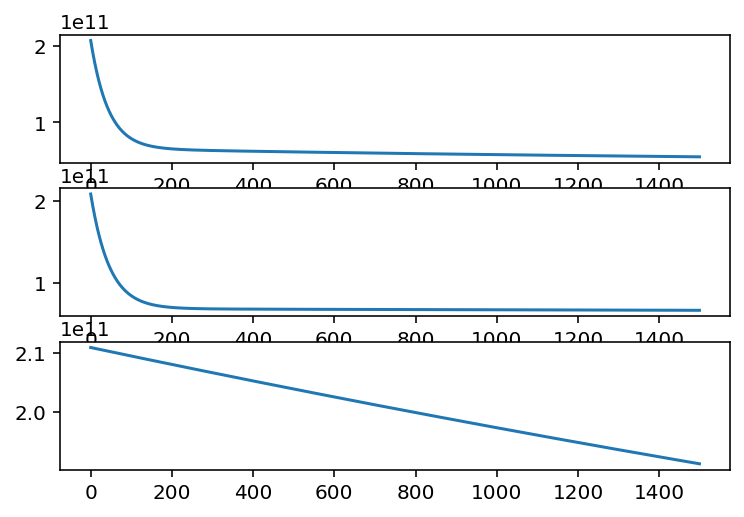

In [7]:
iterations = 1500
alpha = 0.01

# 1st hypothesis
theta, J_history = gradientDescent(data_norm ,price, theta, alpha, iterations) 

# 2nd hypothesis taking only 5 features
data_norm1=np.delete(data_norm, np.s_[6:20], axis=1)
theta1=np.zeros(6)
theta1, J_history1 = gradientDescent(data_norm1 ,price, theta1, alpha, iterations)

# 3rd hypothesis
x1=np.power(data_norm[0:10799,2],1.0)
x2=np.power(data_norm[0:10799,3],2.0)
x3=np.power(data_norm[0:10799,4],3.0)
x4=np.power(data_norm[0:10799,5],4.0)
x1=x1.reshape(10799,1)
x2=x2.reshape(10799,1)
x3=x3.reshape(10799,1)
x4=x4.reshape(10799,1)
data_norm2=np.hstack((x1,x2,x3,x4))
theta2=np.zeros(4)
theta2, J_history2 = gradientDescent(data_norm2 ,price, theta2, alpha, iterations)

plt.subplot(3,1,1)
plt.plot(np.arange(iterations),J_history)
plt.subplot(3,1,2)
plt.plot(np.arange(iterations),J_history1)
plt.subplot(3,1,3)
plt.plot(np.arange(iterations),J_history2)


In [8]:
# Regularizing the cost to avoid overfitting
def computeCostReg(X, y, theta, lambda_):
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly

    
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    H = np.dot(X,theta)
    s = np.subtract(H,y)
    p = np.power(s,2.0)
    m = np.multiply(2,m)
    J1= np.divide(np.sum(p),m)
    R1=np.divide(lambda_, m)
    R2=sum(np.power(theta,2.0))
    J2=np.dot(R1,R2)
    J=np.add(J1,J2)
    # ===========================================================
    return J


def gradientDescentReg(X, y, theta, lambda_, alpha, num_iters):
    
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        alphabym=alpha/m
        sumofh0x=np.dot(X,theta)
        theta=theta-((alpha/m)*(np.dot(X.T,sumofh0x-y)))

        # save the cost J in every iteration
        J_history.append(computeCostReg(X, y, theta, lambda_))
    

    return theta, J_history

[ 3.14188463e+05  5.20932938e+04  5.98292733e+04  1.84367469e+05
  2.72154575e+05  1.80632927e+04  1.06269099e+05  2.18383639e+05
  4.95050460e+05  6.12911080e+04  2.66506061e+05  3.00164886e+05
  2.19265310e+05  1.67929251e+04  1.75539807e+05 -1.17562611e+02
 -4.62893272e+03  2.12080168e+02  2.84150465e+05  1.80381348e+04]


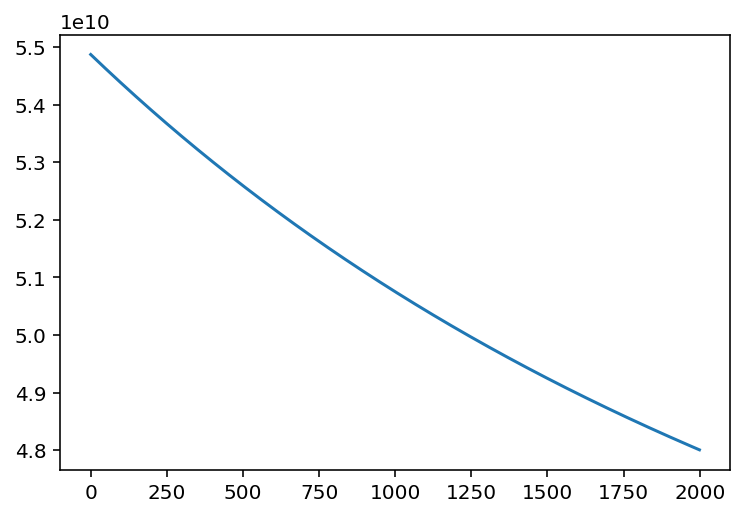

In [9]:
# Running the gradient descent that does the regression
lambda_ = 0.5
alpha = 0.01
iterations = 2000
new_theta, J_history = gradientDescentReg(data_norm, price, theta, lambda_, alpha, iterations)
print(new_theta)

# Plotting the error versus the iteration 
plt.plot(np.arange(iterations),J_history)

In [10]:
kf = KFold(n_splits=3) # Define the split - into 3 folds 
kf.get_n_splits(data_norm) # returns the number of splitting iterations in the cross-validator
print(kf) 
for train_index, test_index in kf.split(data_norm):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data_norm[train_index], data_norm[test_index]
    y_train, y_test = price[train_index], price[test_index]


KFold(n_splits=3, random_state=None, shuffle=False)
TRAIN: [ 3600  3601  3602 ... 10796 10797 10798] TEST: [   0    1    2 ... 3597 3598 3599]
TRAIN: [    0     1     2 ... 10796 10797 10798] TEST: [3600 3601 3602 ... 7197 7198 7199]
TRAIN: [   0    1    2 ... 7197 7198 7199] TEST: [ 7200  7201  7202 ... 10796 10797 10798]


[ 3.17023196e+05  5.58827901e+04  6.26571743e+04  1.82625350e+05
  2.71522775e+05  1.81715050e+04  1.06022719e+05  2.33290186e+05
  4.99373908e+05  6.29584356e+04  2.67038816e+05  3.00583055e+05
  2.18328265e+05  1.72967414e+04  1.59752708e+05 -1.17182504e+02
 -4.72756665e+03  2.74764032e+02  2.88160795e+05  1.80570767e+04]


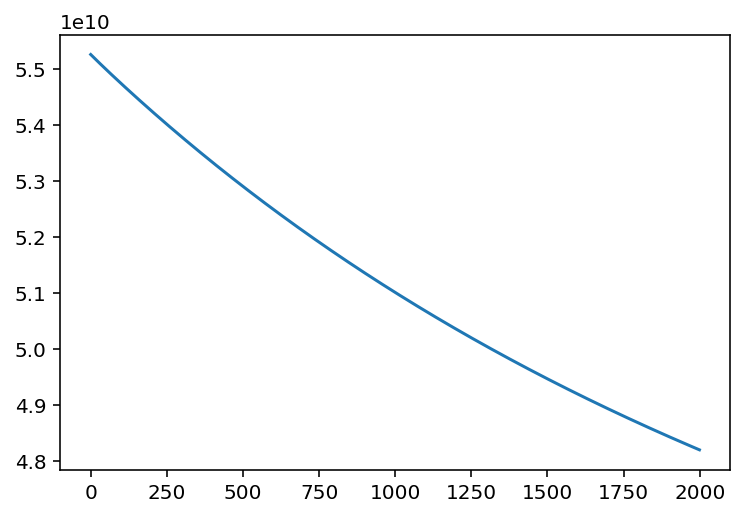

In [11]:
lambda_ = 0.5
alpha = 0.01
iterations = 2000
new_theta, J_history = gradientDescentReg(X_train, y_train, theta, lambda_, alpha, iterations)
print(new_theta)
plt.plot(np.arange(iterations),J_history)

KFold(n_splits=3, random_state=None, shuffle=False)
TRAIN: [ 3600  3601  3602 ... 10796 10797 10798] TEST: [   0    1    2 ... 3597 3598 3599]


Train Cost : 54309379851.189156


Test Cost : 53046077664.29484
TRAIN: [    0     1     2 ... 10796 10797 10798] TEST: [3600 3601 3602 ... 7197 7198 7199]


Train Cost : 53582210400.87863


Test Cost : 54519108023.488976
TRAIN: [   0    1    2 ... 7197 7198 7199] TEST: [ 7200  7201  7202 ... 10796 10797 10798]


Train Cost : 54477089551.25981


Test Cost : 52698503779.83394


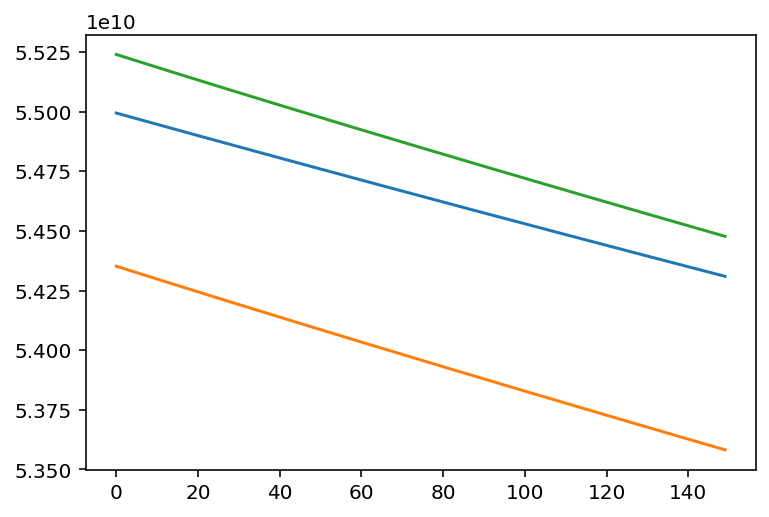

In [12]:
lambda_ = 0.5
alpha = 0.01
iterations = 150
thetatest=0

kf = KFold(n_splits=3) # Define the split - into 3 folds 
kf.get_n_splits(data_norm) # returns the number of splitting iterations in the cross-validator
print(kf) 
for train_index, test_index in kf.split(data_norm):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data_norm[train_index], data_norm[test_index]
    y_train, y_test = price[train_index], price[test_index]
    new_theta1, J_history1 = gradientDescentReg(X_train, y_train, theta, 0.1, alpha, iterations)
    new_theta2, J_history2 = gradientDescentReg(X_train, y_train, theta, 0.25, alpha, iterations)
    new_theta3, J_history3 = gradientDescentReg(X_train, y_train, theta,0.5 , alpha, iterations)
    R=min(J_history1[len(J_history1)-1],J_history2[len(J_history2)-1],J_history3[len(J_history3)-1])
    if(R==J_history1[len(J_history1)-1]):
        J_history=J_history1
        lambda_=0.1
        thetatest=new_theta1
    elif(R==J_history2[len(J_history2)-1]):
        J_history=J_history1
        lambda_=0.25
        thetatest=new_theta2
    else:
        J_history=J_history2
        lambda_=0.5
        thetatest=new_theta3
    print("Train Cost :",J_history[len(J_history)-1])
    plt.plot(np.arange(iterations),J_history)
    new_thetat, J_historyt = gradientDescentReg(X_test, y_test, thetatest, lambda_, alpha, iterations)
    print("Test Cost :",J_historyt[len(J_historyt)-1])
